## Observations and Insights 

1. The drug Ketapril produces the most variable results. This variability may be able to be investigated to reduce confounding variables. This drug may be found to work better for some individuals over others.
2. Out of the drugs tested, Ramicane and Capomulin appear to be the most affective in reducing tumur size in mice. This is indicated by a lower average Total Tumor Volume (mm3) in comparison to other drugs and Placebo.
3. In mice treated with Capomulin, there was a significant correlation between Tumor Volume and Bodyweight of the mouse. This begs the question; what was the dosage given to each mouse for each drug? Was it given relative to their bodyweight, or at a set amount for all animals? Is it necessary to give more drug to a larger individual to yield the same positive effects?


In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = mouse_metadata.merge(study_results, how = 'inner')
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice.
print(f'The Number of mice is: {len(df["Mouse ID"].unique())}')

The Number of mice is: 249


In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = list(df.loc[df.duplicated(['Mouse ID', 'Timepoint'], False)]['Mouse ID'].unique())
duplicate_mice

['g989']

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df['Mouse ID'].isin(duplicate_mice)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df.drop(df.index[df['Mouse ID'].isin (duplicate_mice)])
df_clean.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [42]:
# Checking the number of mice in the clean DataFrame.
print(f'The Number of mice is: {len(df_clean["Mouse ID"].unique())}')


The Number of mice is: 248


## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_stats = pd.DataFrame({'Mean':df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean(),
                               'Median':df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median(),
                               'Variance':df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var(),
                               'std_dev':df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std(),
                               'SEM':df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_vol_stats



,Mean,Median,Variance,std_dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_stats2 = df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
tumor_vol_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

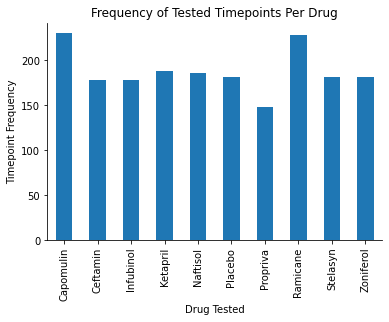

In [92]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_data = df_clean.groupby('Drug Regimen')['Timepoint'].count()
timepoint_data.plot(kind='bar')
plt.xlabel('Drug Tested')
plt.ylabel('Timepoint Frequency')
plt.title('Frequency of Tested Timepoints Per Drug')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


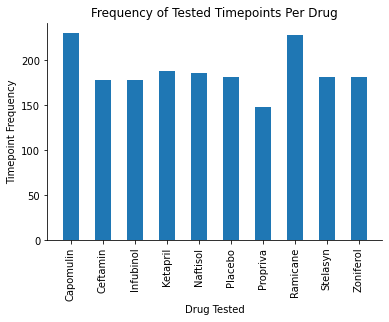

In [94]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoint_data.keys(), timepoint_data.values, width = 0.5)
plt.xticks(timepoint_data.index, rotation = 90)
plt.xlabel('Drug Tested')
plt.ylabel('Timepoint Frequency')
plt.title('Frequency of Tested Timepoints Per Drug')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


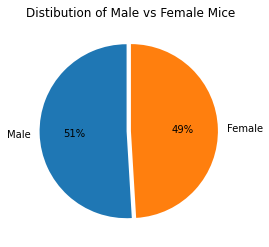

In [95]:
# Generate a pie plot shvalues the distribution of female versus male mice using Pandas
df_clean.Sex.value_counts().plot(kind = 'pie', explode=[0.05,0], autopct='%.0f%%', radius =1, startangle=90)
plt.title('Distibution of Male vs Female Mice')
plt.ylabel('')
plt.show()

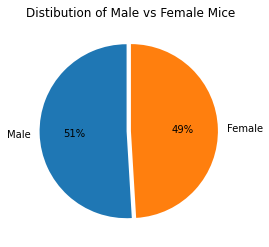

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df_clean.Sex.value_counts(), labels=df_clean.Sex.value_counts().index, explode=[0.05,0], autopct='%.0f%%', radius =1, startangle=90)
plt.title('Distibution of Male vs Female Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Get df with only drugs of interest
df_four = df_clean.loc[df_clean['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

#Get df with last time point
max_time = pd.DataFrame(df_four.groupby(['Mouse ID']).Timepoint.max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_four_last = max_time.merge(df_four, how='inner', on = ['Mouse ID', 'Timepoint'])

df_four_last.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    df = df_four_last.loc[df_four_last['Drug Regimen'] == t] 
    # Determine outliers using upper and lower bounds
    q1 = np.percentile(df['Tumor Volume (mm3)'] , 25)
    q3 = np.percentile(df['Tumor Volume (mm3)'] , 75)
    iqr = q3-q1
    
    #find outliers using iqr
    min_outlier = q1 - (1.5*iqr)
    max_outlier = q3 + (1.5*iqr)
    outliers = df[(df['Tumor Volume (mm3)'] < min_outlier) | (df['Tumor Volume (mm3)'] > max_outlier)]
    tumor_vol[t] = df['Tumor Volume (mm3)']
    if len(outliers) > 0:
        print(f'For Drug {t}, there was {len(outliers)} outlier/s (see below)')
        display(pd.DataFrame(outliers))
    else:
        print(f'For Drug {t}, there were no outliers')

    
tumor_vol_df = pd.DataFrame(tumor_vol)
    

For Drug Capomulin, there were no outliers
For Drug Ramicane, there were no outliers
For Drug Infubinol, there was 1 outlier/s (see below)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
15,c326,5,Infubinol,Female,18,25,36.321346,0


For Drug Ceftamin, there were no outliers


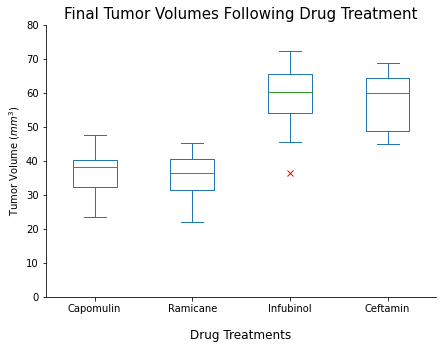

In [99]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol_df.plot(kind = 'box', figsize = (7,5), flierprops=dict(markeredgecolor='red', marker='x'))
plt.ylabel('Tumor Volume ($mm^3$)')
plt.yticks(np.arange(0,90,10))
plt.xlabel('Drug Treatments', fontsize=12, labelpad=15)
plt.title('Final Tumor Volumes Following Drug Treatment', fontsize=15)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

## Line and Scatter Plots

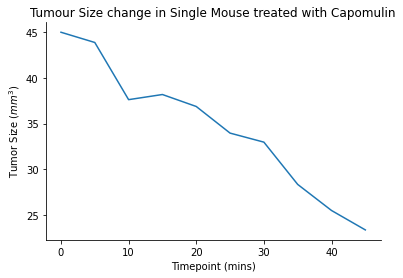

In [78]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Single Mouse
capomulin_mice = df_clean[df_clean['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()
df_capomulin_single = df_clean[df_clean['Mouse ID'] == capomulin_mice[0]]

plt.plot(df_capomulin_single['Timepoint'], df_capomulin_single['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (mins)')
plt.ylabel('Tumor Size ($mm^3$)')  
plt.title('Tumour Size change in Single Mouse treated with Capomulin')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

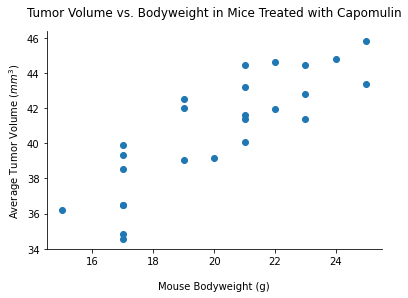

In [79]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df_capomulin = df_clean[df_clean['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()
plt.scatter(df_capomulin['Weight (g)'], df_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Mouse Bodyweight (g)', labelpad = 15)
plt.ylabel('Average Tumor Volume ($mm^3$)')
plt.title('Tumor Volume vs. Bodyweight in Mice Treated with Capomulin', pad = 15)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

## Correlation and Regression

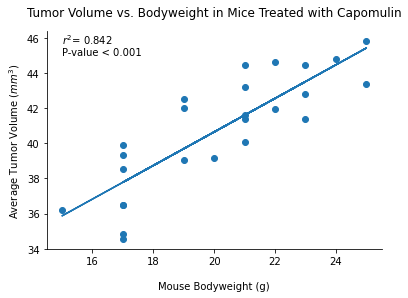

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
linreg = st.linregress(df_capomulin['Weight (g)'], df_capomulin['Tumor Volume (mm3)'])
def tumor_size(weight):
    result = weight * linreg[0] + linreg[1]
    return(result)

plt.scatter(df_capomulin['Weight (g)'], df_capomulin['Tumor Volume (mm3)'])
plt.plot(df_capomulin['Weight (g)'], tumor_size(df_capomulin['Weight (g)']))
plt.text(15,45,f'$r^2$= {round(linreg[2], 3)}\nP-value < 0.001')
plt.xlabel('Mouse Bodyweight (g)', labelpad = 15)
plt.ylabel('Average Tumor Volume ($mm^3$)')
plt.title('Tumor Volume vs. Bodyweight in Mice Treated with Capomulin', pad = 15)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()